# Data Preparation

In [2]:
import numpy as np
import pandas as pd

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
sheet_name='Canada by Citizenship',
skiprows=range(20),
skipfooter=2)

In [3]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

df_can.columns = list(map(str, df_can.columns))
# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [6]:
df_can.set_index('Country', inplace=True)
# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_can['Total'] = df_can.sum(axis=1)
# let's view the first five elements and see how the dataframe was changed
df_can.head()

print ('data dimensions:', df_can.shape)

# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))
years

data dimensions: (195, 38)


['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.3


## 3 Bagaimana memilih negara maju di benua Oceania? dan Plot Jumlah Imigran.

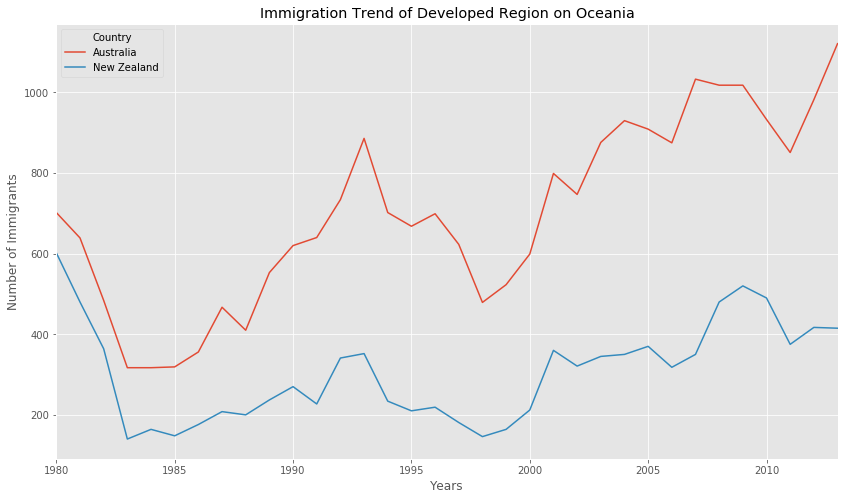

In [11]:
df_can[(df_can['DevName']=='Developed regions') & (df_can['Continent']=='Oceania')]
developed_Oceania = df_can[(df_can['DevName']=='Developed regions') & (df_can['Continent']=='Oceania')]

developed_Oceania = developed_Oceania[years].transpose()

developed_Oceania.index = developed_Oceania.index.map(int) 
developed_Oceania.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Developed Region on Oceania')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

## 4. Bagaimana cara memilih 5 negara maju yang memiliki jumlah imigran terbanyak di benua Europe? Plot Hasil yang anda dapatkan

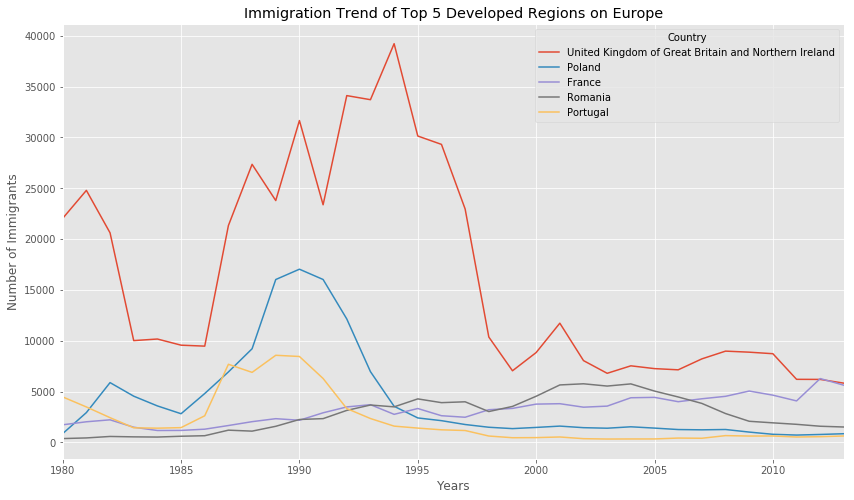

In [19]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top5_developed_Europe = df_can[(df_can['Continent']=='Europe') & (df_can['DevName']=='Developed regions')].head(5)
top5_developed_Europe = top5_developed_Europe[years].transpose()

top5_developed_Europe.index = top5_developed_Europe.index.map(int) 
top5_developed_Europe.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Developed Regions on Europe')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()